In [8]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from minutes import *

import random
import matplotlib.cm as cm

with open('pickles\List_of_kde_scaled.pkl', 'rb') as f:
    loaded_radial_dist_list = pickle.load(f)




<>:11: SyntaxWarning: invalid escape sequence '\L'
<>:11: SyntaxWarning: invalid escape sequence '\L'
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_21264\1004593361.py:11: SyntaxWarning: invalid escape sequence '\L'
  with open('pickles\List_of_kde_scaled.pkl', 'rb') as f:


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
loaded_radial_dist_list[0]
loaded_radial_dist_list[32484][20]

[0, 0.9122746723835069, 0.07467193567802427, 0.0037403259054378307, 0.0018629824876661568, 0.0018623670192329663, 0.0009312860876886553, 4.103122886864544e-07, 0.000931080931544311, 0.0009310809315443087, 2.0515614434213247e-07, 2.196154693842206e-18, 2.196154693842206e-18, 2.0515614433993633e-07, 0.0009308757753999688, 2.051561443399301e-07, 4.392309387684272e-18, 2.0515614434213247e-07, 0.0009310809315443087, 0.0009310809315443087]


0.021259030656825918

86400
The maximum length of the lists is 168
86400.0 lists have a sum of 1.0
17213 lists have a zero value at the first index
 (this is 19.92% of the lists)


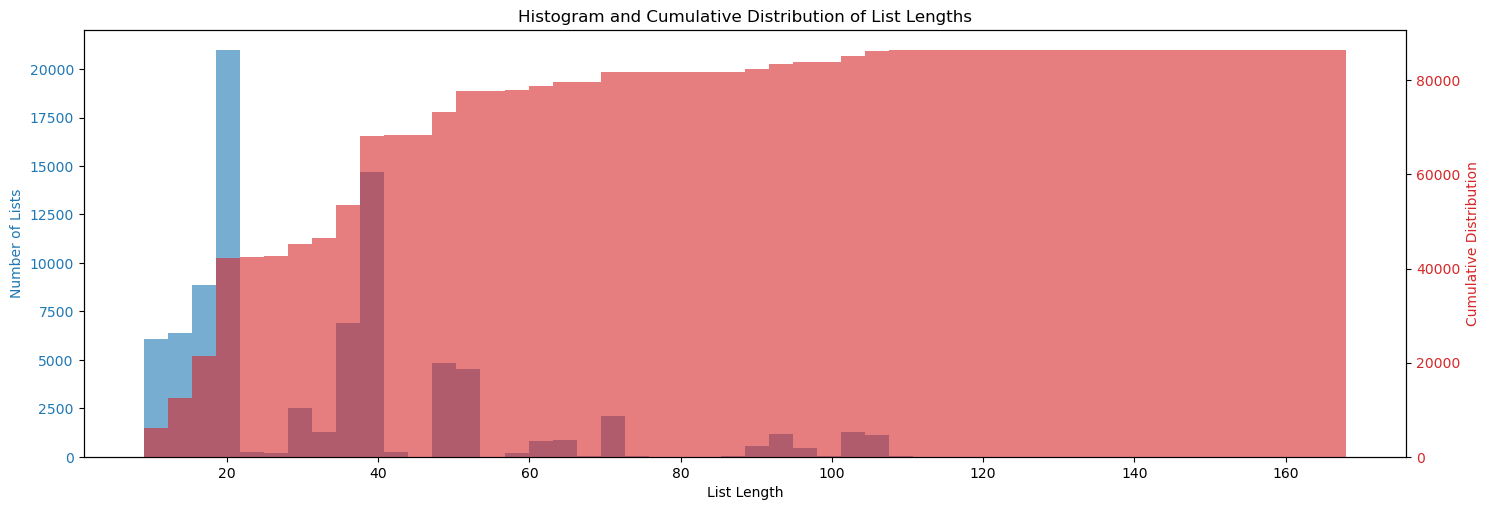

In [18]:
print(len(loaded_radial_dist_list))

# for list in loaded_radial_dist_list:
#     print(len(list))

loaded_list_lengths = [len(list) for list in loaded_radial_dist_list]
loaded_list_sum = [np.array(array).sum() for array in loaded_radial_dist_list]
loaded_list_sum = np.array(loaded_list_sum)
print(f"The maximum length of the lists is {max(loaded_list_lengths)}")
print(f"{sum(loaded_list_sum[np.isclose(loaded_list_sum,1.0,rtol=0.001)])} lists have a sum of 1.0")

loaded_list_zeros = [array[0]==0 for array in loaded_radial_dist_list]
print(f"{sum(loaded_list_zeros)} lists have a zero value at the first index")
print(f" (this is {sum(loaded_list_zeros)/len(loaded_list_zeros)*100:.2f}% of the lists)")

fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:blue'
ax1.set_xlabel('List Length')
ax1.set_ylabel('Number of Lists', color=color)
ax1.hist(loaded_list_lengths, bins=50, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Distribution', color=color)
ax2.hist(loaded_list_lengths, bins=50, cumulative=True, color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Histogram and Cumulative Distribution of List Lengths')
plt.show()


In [ ]:
len(loaded_radial_dist_list)

86400

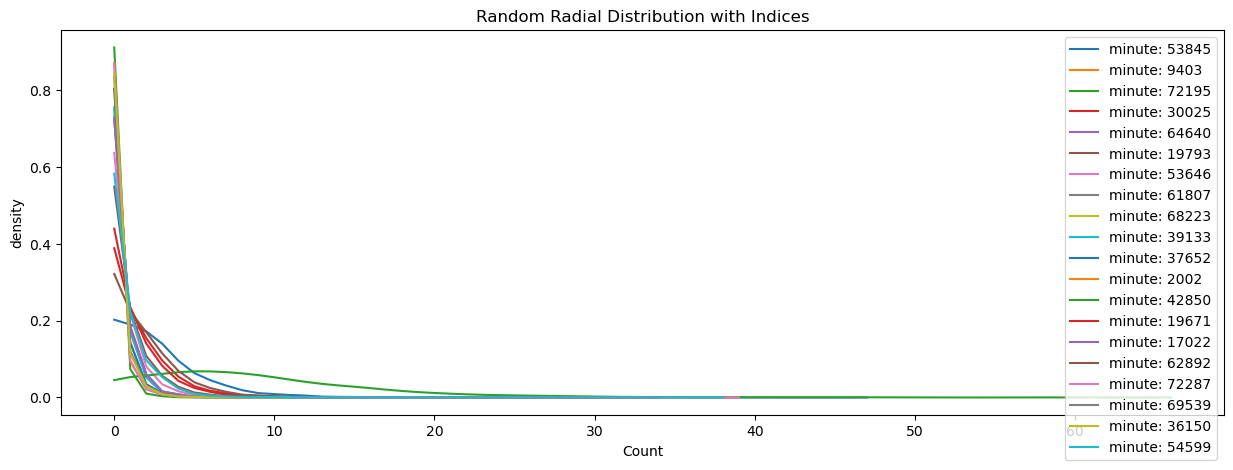

In [ ]:
n_plots = 20
random_indices = random.sample(range(len(loaded_radial_dist_list)), n_plots)
biggest_indices = sorted(range(len(loaded_radial_dist_list)), key=lambda i: len(loaded_radial_dist_list[i]), reverse=True)[:n_plots]

plot_indices = [random_indices, biggest_indices]

plt.figure(figsize=(15, 5))
for idx in plot_indices[0]:
    rd = loaded_radial_dist_list[idx]
    plt.plot(rd, label=f'minute: {idx}')  
 



plt.legend()
plt.title('Random Radial Distribution with Indices')
plt.xlabel('Count')
plt.ylabel('density')
plt.show()

7981


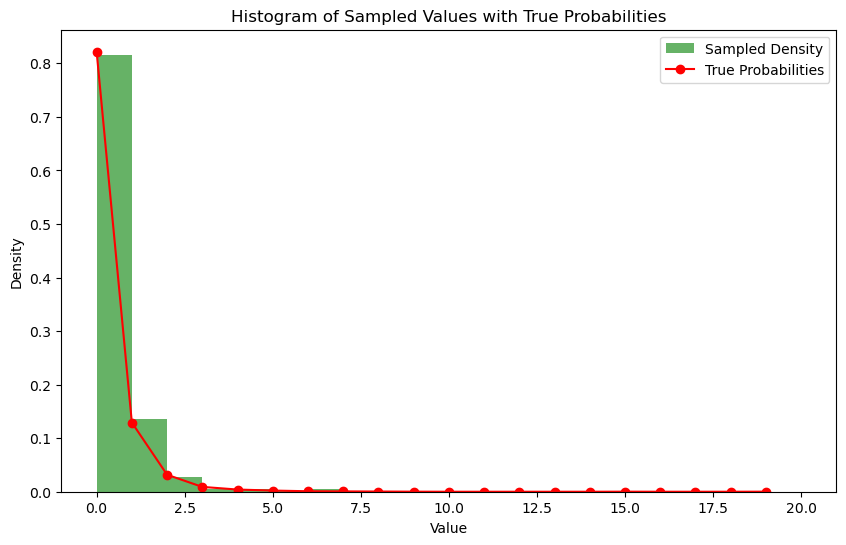

In [21]:
from models import sample_integer

def plot_sample_distribution(sample, probabilities):
    plt.figure(figsize=(10, 6))
    plt.hist(sample, bins=np.arange(len(probabilities) + 1), density=True, alpha=0.6, color='g', label='Sampled Density')

    # Verification plot
    plt.plot(np.arange(len(probabilities)), probabilities, 'ro-', label='True Probabilities')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Histogram of Sampled Values with True Probabilities')
    plt.legend()
    plt.show()

minute = 5*1440 + 60*13 + 1
print(minute)

# Example usage
probabilities = loaded_radial_dist_list[minute]
sample_size = 1000
sample = sample_integer(probabilities, sample_size)

plot_sample_distribution(sample, probabilities)


All values in the sample are 0.


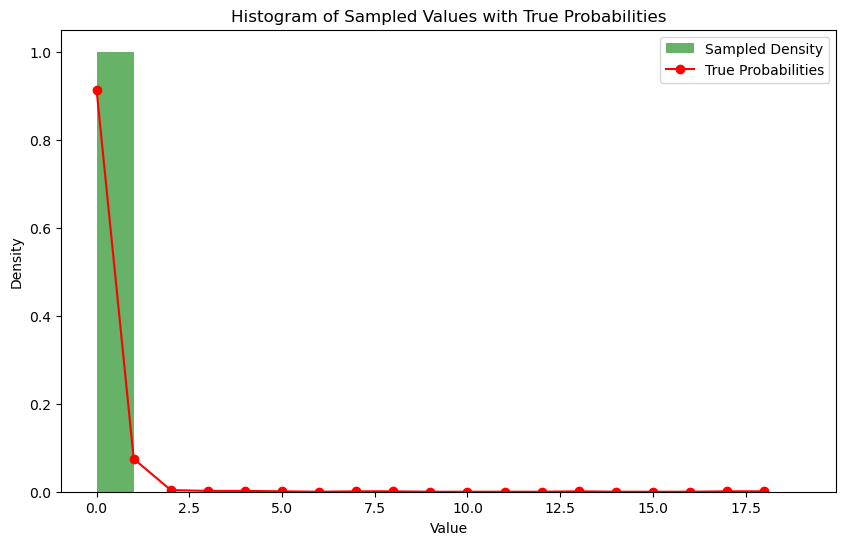

[9.12274672e-01 7.46719357e-02 3.74032591e-03 1.86298249e-03
 1.86236702e-03 9.31286088e-04 4.10312289e-07 9.31080932e-04
 9.31080932e-04 2.05156144e-07 2.19615469e-18 2.19615469e-18
 2.05156144e-07 9.30875775e-04 2.05156144e-07 4.39230939e-18
 2.05156144e-07 9.31080932e-04 9.31080932e-04]


In [ ]:
from models import sample_ticket

ticket_sample_criteria = [0.05, 10]
probabilities = loaded_radial_dist_list[0]#[32484]
sample = sample_ticket(probabilities, *ticket_sample_criteria, verbose=True)
plot_sample_distribution(sample, probabilities)
print(probabilities)
